# Task 6: House Price Prediction Dataset

We use HDP dataset to learn, loading json to python, exploring it and finally plotting it.

## To download kaggle dataset

I am downloading the House Price Prediction Dataset from kaggle.com, to use opendatasets with kaggle, we need to first download the kaggle.json file which have credentials of kaggle from kaggle.com. The process of downloading kaggle.json changes time by time, if you go to settings on kaggle there is an option to generate token and it will automatically download kaggle.json file. 1: Upload that kaggle.json file into google drive, and use below code to copy that file from google drive to notebook os environment. NOTE: please keep that kaggle.json file secret and don't share with anyone, cause whoever have access to that file can do serious things with your kaggle account

## Copying kaggle.json file from Google drive to notebook os

1: Installs google.colab library and mounts Google Drive  
2: creates a .kaggle hidden folder on OS home directory  
3: copy kaggle.json from Google Drive to that .kaggle hidden folder  
4: give linux file permission to .kaggle/kaggle.json to be readable by notebook and python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/.secrets/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


## Use the Kaggle CLI to download the dataset

In [2]:
!kaggle datasets download -d zafarali27/house-price-prediction-dataset
!unzip house-price-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/28.7k [00:00<?, ?B/s]
100% 28.7k/28.7k [00:00<00:00, 117MB/s]
Archive:  house-price-prediction-dataset.zip
  inflating: House Price Prediction Dataset.csv  


The dataset is downloaded and is in file system or google drive if are running the notebook on Google colab. Now trying to load it to pandas. This library is already available on google colab if you are running this notebook on a system where pandas is not installed, please use pip install pandas to install the library first then run below cells

In [83]:
import pandas as pd

hpp = pd.read_csv('/content/House Price Prediction Dataset.csv')

## Exploratory data analysis

In [84]:
hpp.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


## Preprocessing the data

1: removing duplicate values  
2: removing NaN values  
3: change column names to all lower case and removing spaces between  
4: converting string values to numbers  
5: scaling values to be between 0..1 for better training  
6: finding outliers and removing  

In [85]:
# 1: removing duplicate values
duplicates = hpp[hpp.duplicated()]
print(duplicates.count())

# there is no duplicate values so no need to remove

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [86]:
# 2: removing NaN values
hpp[hpp.isna().any(axis=1)]

# there is no NaN values so no need to remove

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [87]:
# 3: change column names to all lower case and removing spaces between
hpp.columns = hpp.columns.str.lower().str.replace(" ", "_")

In [88]:
hpp.columns

Index(['id', 'area', 'bedrooms', 'bathrooms', 'floors', 'yearbuilt',
       'location', 'condition', 'garage', 'price'],
      dtype='object')

In [89]:
hpp.head()

,id,area,bedrooms,bathrooms,floors,yearbuilt,location,condition,garage,price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [90]:
hpp['location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [91]:
hpp['condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [92]:
hpp['garage'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
# 4: converting string values to numbers

# converting location strings to numbers
location_map = {'Downtown': 0, 'Suburban': 1, 'Urban': 2, 'Rural': 3}
hpp['location'] = hpp['location'].map(location_map)
reverse_location_map = {v: k for k, v in location_map.items()}

# converting condition strings to numbers
condition_map = {'Excellent': 0, 'Good': 1, 'Fair': 2, 'Poor': 3}
hpp['condition'] = hpp['condition'].map(condition_map)
reverse_condition_map = {v: k for k, v in condition_map.items()}

# converting condition strings to numbers
garage_map = {'No': 0, 'Yes': 1}
hpp['garage'] = hpp['garage'].map(garage_map)
reverse_garage_map = {v: k for k, v in garage_map.items()}

In [94]:
hpp.head()

,id,area,bedrooms,bathrooms,floors,yearbuilt,location,condition,garage,price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,1,0,266746
3,4,966,4,2,2,1902,1,2,1,244020
4,5,4926,1,4,2,1975,0,2,1,636056


## Training logistics model from that data

To train the model  
1: split vertical data to features and labels  
2: split horizontal data to test and train

In [95]:
from sklearn.model_selection import train_test_split

X = hpp.drop("price", axis=1)
y = hpp["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 9), (400, 9), (1600,), (400,))

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

In [107]:
# checking if there was any big difference in scale
print(y_test.min(), y_test.max())
print(y_pred_lr.min(), y_pred_lr.max())

51082 999656
486354.030660241 592537.2528532662


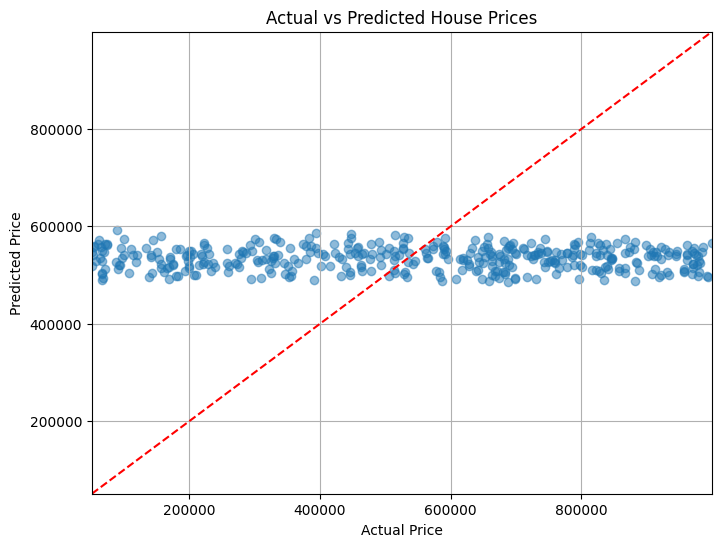

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test.reset_index(drop=True), y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 244228.90963707573
Root Mean Squared Error (RMSE): 280764.52415729105
